##PCA (Principal Component Analysis)

PCA (Principal Component Analysis) is a method that simplifies high-dimensional data while minimizing information loss. It is like compressing complex, multi-dimensional information into fewer dimensions while preserving the main meaning.

PCA finds the directions in the data with the highest variance and projects the data onto those directions.

PCA is a signal-extraction method that compresses data with many features into fewer dimensions while keeping the essential information.

Suppose the dataset has 100 features (Age, income, balance, credit score, etc.). Some of these 100 features carry duplicate information. In reality, just 2–3 directions explain the main information in those 100 features. These new directions are called Principal Components.

Why is PCA important?

✔️ 1. Reduces the number of features (dimensionality reduction)
100 variables → 5 variables
But about 90% of the information remains.

✔️ 2. Speeds up models
KNN, Logistic Regression, and SVM run faster.

✔️ 3. Solves multicollinearity problems
(When independent variables (X) are highly correlated.)
Highly correlated features are eliminated through PCA.

✔️ 4. Useful for visualization
Ideal for showing non-3D data in a 2D plot.

How does PCA work?

1️⃣ Standardizes the features

2️⃣ Builds the correlation matrix

3️⃣ Finds where the highest variance is

4️⃣ Creates new axes (PC1, PC2, PC3…)

5️⃣ Projects the data onto these axes

#PCR (Principal Component Regression)
PCR = PCA + Linear Regression.

This means the dimensionality is reduced using PCA, and then Linear Regression is built using the new components.

PCR is a method that finds the most informative directions via PCA and performs regression using those components.

Why use PCR?

✔ Solves multicollinearity
Highly correlated features are condensed into a single component through PCA.

✔ Reduces overfitting
Unnecessary dimensions are removed → the model becomes more stable.

✔ Very effective for high-dimensional data
Even if there are 500 features, 5–10 components may be enough.

When to use PCR

When the number of features is very large

When features are highly similar or correlated (multicollinearity)

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/A15---24-Machine-learning-/refs/heads/main/Hitters.csv')

### Baseball dataset
### Objective: to predict the player’s salary (y = Salary)

In [60]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [61]:
df.shape

(322, 20)

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [63]:
df.isna().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


In [64]:
df = df.dropna()
df.shape

(263, 20)

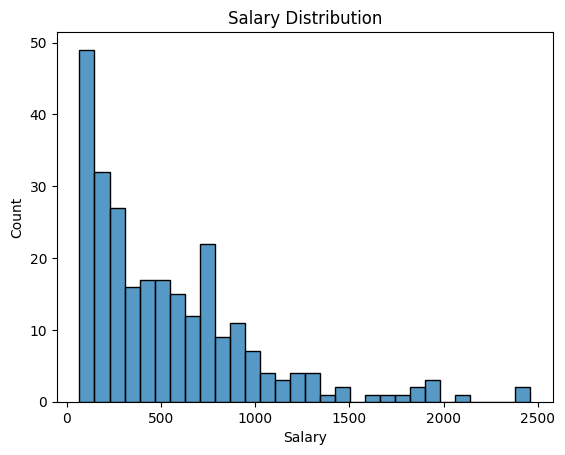

In [65]:
#Salary distribution
plt.figure()
sns.histplot(df["Salary"], bins=30)
plt.title("Salary Distribution")
plt.show()

In [66]:

numeric_cols = df.select_dtypes(include=["int64", "float64"])
corr = numeric_cols.corr()

corr["Salary"].sort_values(ascending=False)

,Salary
Salary,1.000000
CRBI,0.566966
CRuns,0.562678
CHits,0.548910
CAtBat,0.526135
CHmRun,0.524931
CWalks,0.489822
RBI,0.449457
Walks,0.443867
Hits,0.438675


##Categorical variable analysis

In [67]:
df.groupby("League")["Salary"].mean()

,Salary
League,
A,541.999547
N,529.117500


In [68]:
df.groupby("Division")["Salary"].mean()

,Salary
Division,
E,624.271364
W,450.876873


In [69]:
print(df["League"].value_counts())
print(df["Division"].value_counts())
print(df["NewLeague"].value_counts())

League
A    139
N    124
Name: count, dtype: int64
Division
W    134
E    129
Name: count, dtype: int64
NewLeague
A    141
N    122
Name: count, dtype: int64


In [70]:
##One- hot encoding is essential

df = pd.get_dummies(
    df,
    columns=["League", "Division", "NewLeague"],
    drop_first=True,
    dtype=int   )

In [71]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [72]:
df.corr()
# Correlation between numerical columns and Salary
# Offense: AtBat, Hits, HmRun, RBI, Runs, Walks
# Career: CAtBat, CHits, CHmRun, CRBI, CRuns, CWalks
# Defense: PutOuts, Assists, Errors
# Years – Player’s league experience (in years)
# CAtBat – Total number of at-bats over the player’s career
# CHits – Total number of hits over the player’s career
# CHmRun – Total number of home runs over the player’s career
# CRuns – Total number of runs over the player’s career
# CRBI – Total number of RBIs over the player’s career
# CWalks – Total number of walks over the player’s career

# Correlation between numerical columns and Salary

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.394771,-0.153176,-0.056341,-0.089838
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.438675,-0.153522,-0.083266,-0.094990
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.343028,-0.222965,-0.034851,-0.199424
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.419859,-0.206001,-0.107672,-0.154911
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.449457,-0.185858,-0.090157,-0.143549
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.443867,-0.065760,-0.072732,-0.028461
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.400657,-0.032893,-0.020316,-0.023964
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.526135,-0.023704,-0.018623,-0.004294
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.548910,-0.022853,-0.023642,0.000887
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.524931,-0.107299,-0.026987,-0.100298


In [73]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling must be applied BEFORE PCA (using StandardScaler).
Because PCA is variance-based, if the features are on different scales, the results will be incorrect.

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [75]:
# We do not touch y (train/test)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Applying PCA (initial inspection – how many components are needed?)


In [76]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

In [77]:
#Cumulation
import numpy as np

np.cumsum(pca.explained_variance_ratio_)

array([0.38725214, 0.59995816, 0.70885265, 0.79057242, 0.84303781,
       0.88543264, 0.92102397, 0.94855285, 0.96348031, 0.97293483,
       0.98023926, 0.98694318, 0.99176303, 0.994866  , 0.99746912,
       0.99909251, 0.99972526, 0.99994326, 1.        ])

Visualization: how many components should we choose?

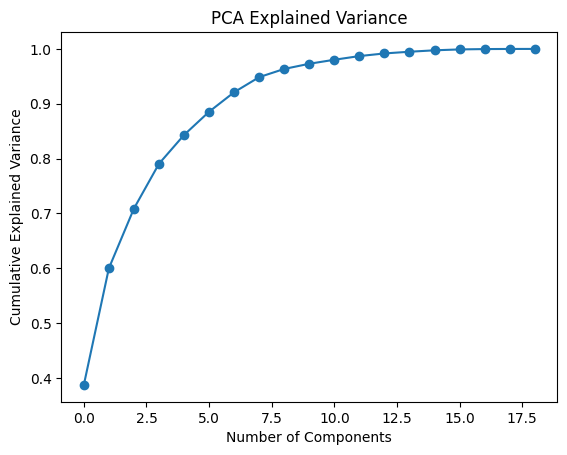

In [78]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

In [79]:
# For example, let’s retain 95% of the variance:
pca = PCA(n_components=0.92)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [80]:
X_train_pca.shape
# The number of features decreased, while the information was preserved ✅

(210, 7)

PCA + Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

rmse, r2

(np.float64(387.04658196716923), 0.17176209446697)

#Simple Linear Regression

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X_new = df.drop("Salary", axis=1)
y_new = df["Salary"]

# Perform train-test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Scale the features
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

# Build and train the simple linear regression model
lr_simple_fresh = LinearRegression()
lr_simple_fresh.fit(X_train_scaled_new, y_train_new)

# Make predictions
y_pred_simple_fresh = lr_simple_fresh.predict(X_test_scaled_new)

# Evaluate the model
mse_simple_fresh = mean_squared_error(y_test_new, y_pred_simple_fresh)
rmse_simple_fresh = np.sqrt(mse_simple_fresh)
r2_simple_fresh = r2_score(y_test_new, y_pred_simple_fresh)

print(f"Simple Linear Regression (fresh) RMSE: {rmse_simple_fresh}")
print(f"Simple Linear Regression (fresh) R2: {r2_simple_fresh}")

Simple Linear Regression (fresh) RMSE: 358.1680408645131
Simple Linear Regression (fresh) R2: 0.290745185579814


In [83]:
coefficients_df = pd.DataFrame({
    'Feature': X_new.columns,
    'Coefficient': lr_simple_fresh.coef_
})
print("Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {lr_simple_fresh.intercept_}")

Coefficients:
        Feature  Coefficient
0         AtBat  -212.692930
1          Hits   325.155262
2         HmRun    41.931298
3          Runs   -70.810146
4           RBI   -36.587948
5         Walks   116.936215
6         Years    38.092127
7        CAtBat  -535.084513
8         CHits    72.265737
9        CHmRun   -40.676042
10        CRuns   574.500346
11         CRBI   311.828505
12       CWalks  -216.663595
13      PutOuts    74.879063
14      Assists    31.802497
15       Errors    -4.129669
16     League_N    53.980516
17   Division_W   -56.911608
18  NewLeague_N   -31.839290

Intercept: 543.6646238095238
